<a href="https://colab.research.google.com/github/1Kote/reconhecimento_facial_IA/blob/bento/ReconhecimentoFacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecção de faces usando o HOG com SVM

In [ ]:
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

importando a imagem para aplicação

In [ ]:
image = cv2.imread("/content/people1.jpg")
image.shape

(1120, 1680, 3)

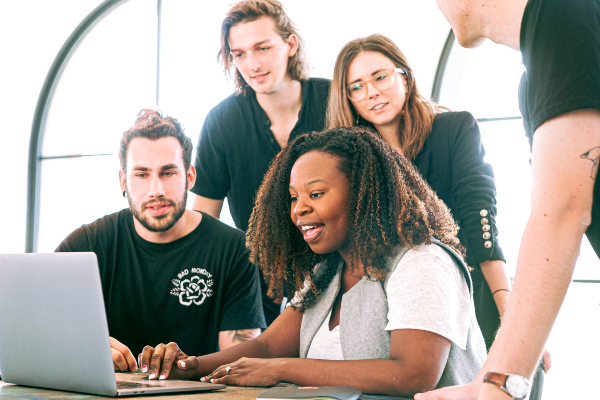

In [ ]:
image = cv2.resize(image,(600, 400))
cv2_imshow(image)

Adicionando o detector de faces da biblioteca dlib e checando quantas detecções foram feitas.

OBS:

- Esse detector é mais indicado para imagens frontais.
- Não precisa mudar a imagem para escala de cinza.


In [ ]:
face_detector = dlib.get_frontal_face_detector()
detection = face_detector(image)
len(detection)

4

Ele retorna uma matriz de tuplas os quais os valores representam a localização das faces.


In [ ]:
detection

rectangles[[(117, 157) (189, 229)], [(341, 61) (413, 133)], [(266, 160) (352, 246)], [(213, 21) (285, 93)]]

Criando as marcações das faces na imagem.

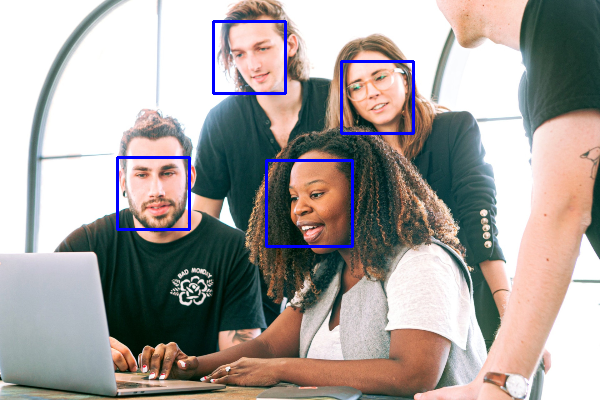

In [ ]:
for face in detection:
  left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)

cv2_imshow(image)

### Paramêtro Upsampling

- Usado para detectar faces pequenas em imagens grandes, para isso é necessário imcrementar a resolução da imagem de entrada, fazendo com que as faces menores pareçam maiores.
- Quanto maior o valor do pârametro maior será o tempo de processamento da detecção.

In [ ]:
image_with_many_persons = cv2.imread('/content/people4.jpg')

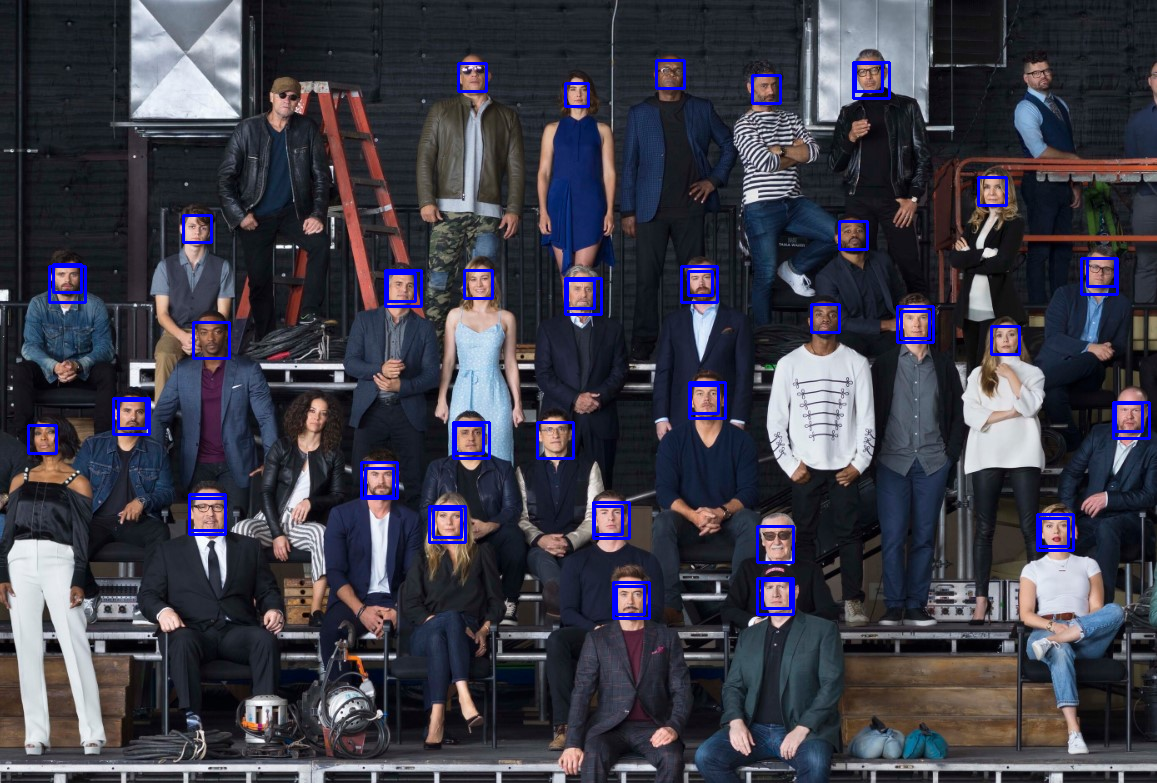

In [ ]:
detection2 = face_detector(image_with_many_persons, 1)
for face in detection2:
  left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image_with_many_persons, (left, top), (right, bottom), (255, 0, 0), 2)

cv2_imshow(image_with_many_persons)


Com o aumento do valor do parâmetro Upsampling houve uma aumento no número de faces detectadas. Isso pode ser util imaginando um cénario de sala de aula onde existe muitos alunos em sala.

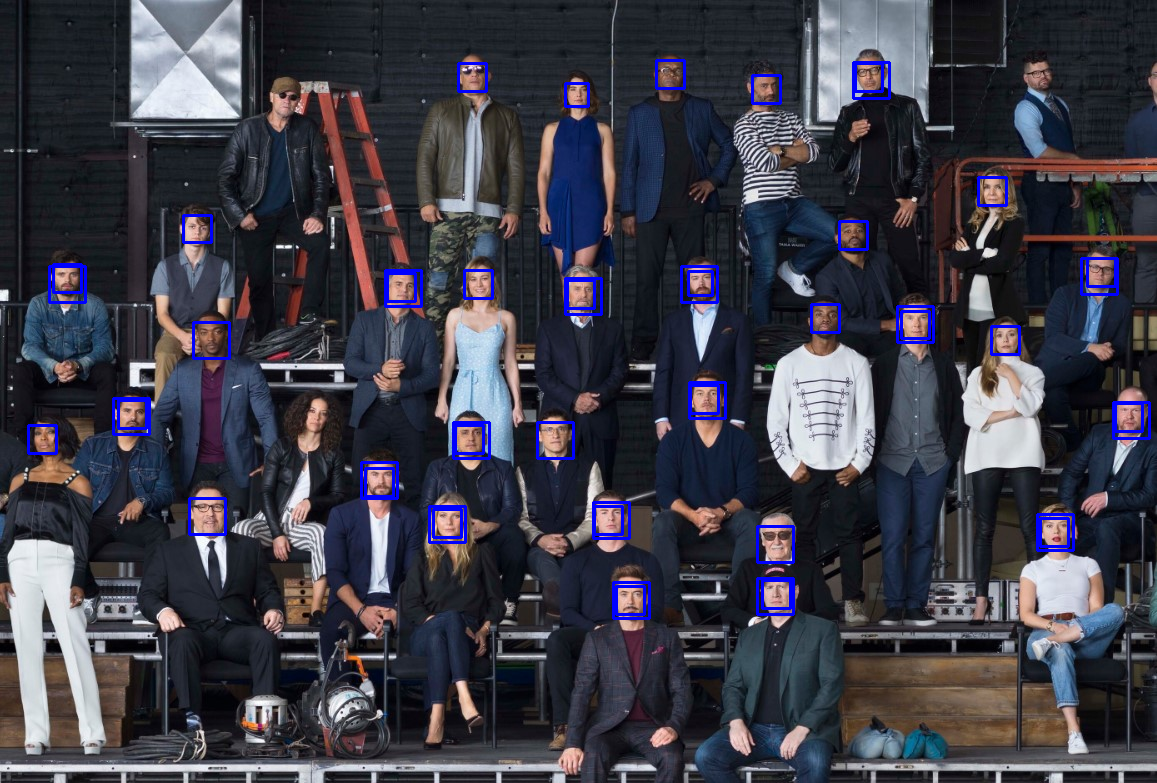

In [ ]:
detection2 = face_detector(image_with_many_persons, 4)
for face in detection2:
  left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image_with_many_persons, (left, top), (right, bottom), (255, 0, 0), 2)

cv2_imshow(image_with_many_persons)


### MOD/CNN
Uma tecnica mais avançada que nos possibilita reconhecer faces com mudanças de ângulos do rosto.

In [ ]:
image_many_person = cv2.imread('/content/people1.jpg')
image_many_person.shape


(1120, 1680, 3)

In [ ]:
image_many_person = cv2.resize(image_many_person, (600, 400))
detector_cnn_mod = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')
image_many_person.shape

(400, 600, 3)

In [ ]:
cnn_detections = detector_cnn_mod(image_many_person, 1)
cnn_detections


mmod_rectangles[[(226, 31) (283, 88)], [(341, 54) (398, 111)], [(120, 144) (188, 212)], [(269, 164) (351, 246)]]

1.1121736764907837
1.1051671504974365
1.0970476865768433
1.0897091627120972


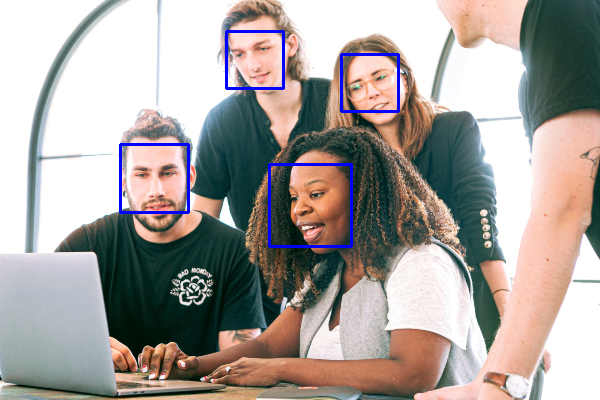

In [ ]:
for face in cnn_detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image_many_person, (l, t), (r, b), (255, 0, 0), 2)
cv2_imshow(image_many_person)

1.0841917991638184
1.0722935199737549
1.035447597503662
1.0153300762176514


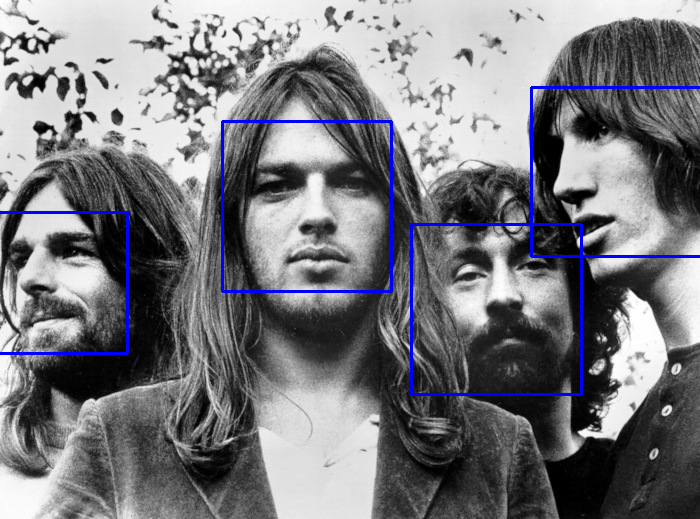

In [ ]:
image_many_person = cv2.imread('/content/people5.jpg')
cnn_detections = detector_cnn_mod(image_many_person, 1)
for face in cnn_detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image_many_person, (l, t), (r, b), (255, 0, 0), 2)
cv2_imshow(image_many_person)